
Machine Learning Automation

dataset : cars https://www.openml.org/search?type=data&status=active&id=455

TPOT http://epistasislab.github.io/tpot/,

Niapy https://niapy.org/en/stable/

In [ ]:
#installing tpot
%pip install tpot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#installing NiaPY
%pip install niapy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Perintah tersebut digunakan untuk menginstal dua paket Python, yaitu tpot dan niapy, yang merupakan perpustakaan untuk otomatisasi machine learning (TPOT) dan optimasi algoritma metaheuristik (Niapy). Ini memungkinkan pengguna untuk mengotomatiskan proses pembelajaran mesin dan menggunakan algoritma optimasi evolusioner dalam pemrograman Python.

In [ ]:
%pip install pandas scipy matplotlib seaborn scikit-learn niapy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import module
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import DifferentialEvolution

1. import pandas as pd: Mengimpor modul pandas dengan alias pd, yang digunakan untuk analisis dan manipulasi data.
2. from scipy.io import arff: Mengimpor fungsi arff dari modul scipy.io, yang digunakan untuk membaca file dalam format ARFF (Attribute-Relation File Format).
3. import matplotlib.pyplot as plt: Mengimpor modul matplotlib.pyplot dengan alias plt, yang digunakan untuk membuat visualisasi data.
4. import seaborn as sns: Mengimpor modul seaborn dengan alias sns, yang digunakan untuk membuat visualisasi data yang lebih menarik dan informatif.
5. from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul sklearn.model_selection, yang digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian.
6. from sklearn.preprocessing import StandardScaler: Mengimpor kelas StandardScaler dari modul sklearn.preprocessing, yang digunakan untuk menormalkan fitur-fitur dataset.
7. from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul sklearn.metrics, yang digunakan untuk mengukur kinerja model klasifikasi.
8. from sklearn.ensemble import RandomForestClassifier: Mengimpor kelas RandomForestClassifier dari modul sklearn.ensemble, yang digunakan untuk membangun model klasifikasi menggunakan algoritma Random Forest.
9. from niapy.task import Task: Mengimpor kelas Task dari modul niapy.task, yang digunakan untuk menentukan masalah optimasi untuk algoritma optimasi.
10. from niapy.problems import Problem: Mengimpor kelas Problem dari modul niapy.problems, yang digunakan untuk mendefinisikan masalah optimasi kustom.
11. from niapy.algorithms.basic import DifferentialEvolution: Mengimpor kelas DifferentialEvolution dari modul niapy.algorithms.basic, yang merupakan implementasi algoritma Differential Evolution untuk optimasi.


In [ ]:
# Load the ARFF file
file_path = 'I:/ML/cars.arff'  # Update with your actual path
data, meta = arff.loadarff(file_path)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Melihat beberapa baris pertama
print(df.head())

                           name   mpg cylinders  displacement  horsepower  \
0  b'chevrolet_chevelle_malibu'  18.0      b'8'         307.0       130.0   
1          b'buick_skylark_320'  15.0      b'8'         350.0       165.0   
2         b'plymouth_satellite'  18.0      b'8'         318.0       150.0   
3              b'amc_rebel_sst'  16.0      b'8'         304.0       150.0   
4                b'ford_torino'  17.0      b'8'         302.0       140.0   

   weight  acceleration  model.year origin  
0  3504.0          12.0        70.0   b'1'  
1  3693.0          11.5        70.0   b'1'  
2  3436.0          11.0        70.0   b'1'  
3  3433.0          12.0        70.0   b'1'  
4  3449.0          10.5        70.0   b'1'  


**Penjelasan Code**

1.	file_path = '/content/cars.arff': Menetapkan jalur ke file ARFF yang akan dibaca. Dalam hal ini, file tersebut berada di direktori /content dan bernama cars.arff. Jalur ini perlu disesuaikan sesuai lokasi file di Google Colab.

2.	data, meta = arff.loadarff(file_path): Menggunakan fungsi loadarff dari scipy.io.arff untuk membaca file ARFF. Fungsi ini mengembalikan dua objek: data yang berisi data sebenarnya, dan meta yang berisi metadata tentang atribut data.

3.	df = pd.DataFrame(data): Mengubah data yang dibaca dari file ARFF menjadi sebuah DataFrame pandas. DataFrame adalah struktur data tabular 2D dengan label baris dan kolom, yang sangat berguna untuk manipulasi dan analisis data.

4.	print(df.head()): Menampilkan beberapa baris pertama dari DataFrame. Fungsi head() secara default menampilkan lima baris pertama, memungkinkan kita untuk melihat sekilas isi DataFrame dan memastikan data telah dimuat dengan benar.


**Penjelasan output**

Output menampilkan beberapa baris pertama dari DataFrame yang dibaca dari file ARFF. DataFrame berisi beberapa kolom dengan nama-nama berikut:
1.	name: Nama mobil, seperti 'chevrolet_chevelle_malibu', 'buick_skylark_320', dan lain-lain. Data ini dalam format byte string yang perlu di-decode ke format string biasa.
2.	mpg: Miles per gallon (jumlah mil yang dapat ditempuh per galon bahan bakar), seperti 18.0, 15.0, dan seterusnya.
3.	cylinders: Jumlah silinder dalam mesin mobil, seperti '8' dalam format byte string yang juga perlu di-decode.
4.	displacement: Ukuran mesin dalam inci kubik, seperti 307.0, 350.0, dll.
5.	horsepower: Tenaga kuda (horsepower) mesin, seperti 130.0, 165.0, dll.
6.	weight: Berat mobil dalam pound, seperti 3504.0, 3693.0, dll.
7.	acceleration: Waktu yang diperlukan mobil untuk mencapai kecepatan tertentu (biasanya 0 hingga 60 mph) dalam detik, seperti 12.0, 11.5, dll.
8.	model.year: Tahun model mobil, seperti 70.0, 71.0, dll.
9.	origin: Kode asal mobil yang dalam format byte string, seperti '1'.

Output ini menunjukkan bahwa data yang dimuat ke dalam DataFrame sudah berhasil dan mencakup beberapa informasi penting tentang berbagai mobil. Kolom yang dalam format byte string (name, cylinders, origin) perlu di-decode ke format string biasa agar lebih mudah digunakan dalam analisis data lebih lanjut.


# **Data Exploration**
*penjelasan, pembuatan heatmap untuk ngecek correlation*

In [ ]:
# Menampilkan informasi umum tentang data
print(df.info())

# Menampilkan statistik deskriptif
print(df.describe())

# Memeriksa missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          406 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     406 non-null    object 
 3   displacement  406 non-null    float64
 4   horsepower    400 non-null    float64
 5   weight        406 non-null    float64
 6   acceleration  406 non-null    float64
 7   model.year    406 non-null    float64
 8   origin        406 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.7+ KB
None
              mpg  displacement  horsepower       weight  acceleration  \
count  398.000000    406.000000  400.000000   406.000000    406.000000   
mean    23.514573    194.779557  105.082500  2979.413793     15.519704   
std      7.815984    104.922458   38.768779   847.004328      2.803359   
min      9.000000     68.000000   46.000000  1613.000000      8.00000

**Penjelasan Code**

1. Fungsi df.info() memberikan ringkasan informasi tentang DataFrame, termasuk jumlah total baris, jumlah non-null values di setiap kolom, dan tipe data dari masing-masing kolom. Ini berguna untuk memahami struktur dan isi dasar dari dataset.

2. Fungsi df.describe() memberikan statistik deskriptif dasar untuk kolom numerik dalam DataFrame, seperti mean (rata-rata), standard deviation (standar deviasi), minimum, maksimum, dan kuartil (25%, 50%, 75%). Ini membantu dalam memahami distribusi dan rentang data numerik.

3. Fungsi df.isnull().sum() menghitung jumlah nilai yang hilang (missing values) di setiap kolom. Ini penting untuk mendeteksi masalah dalam dataset yang perlu ditangani sebelum analisis lebih lanjut, seperti imputasi missing values atau penghapusan baris/kolom yang memiliki banyak missing values.

**Output**

Secara keseluruhan, output ini memberikan informasi tentang tipe data, jumlah nilai yang hilang di setiap kolom, dan ringkasan statistik deskriptif untuk kolom numerik dalam dataset. Informasi ini sangat penting untuk langkah-langkah preprocessing dan analisis data lebih lanjut.


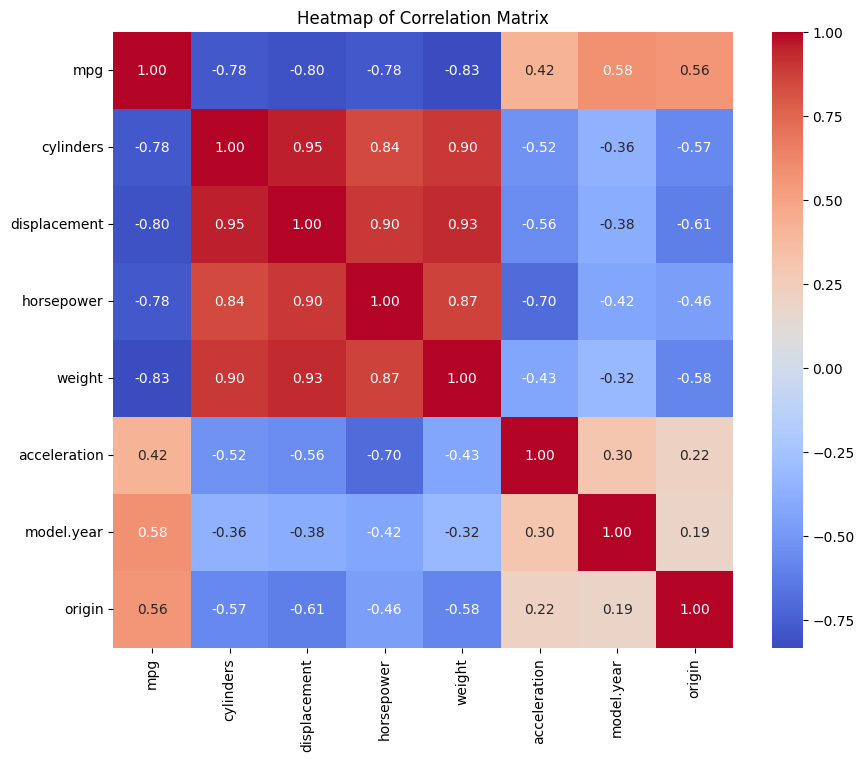

In [ ]:
# Decode byte strings to string type
for column in ['cylinders', 'origin']:
    df[column] = df[column].str.decode('utf-8')

# Calculate the correlation matrix, excluding non-numeric columns
numeric_df = df.drop(columns=['name'])
corr_matrix = numeric_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Penjelasan Code**

1.	plt.figure(figsize=(10, 8)): Membuat gambar baru dengan ukuran 10x8 inci menggunakan plt.figure() dari modul matplotlib.pyplot.
2.	sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f'): Membuat heatmap dari matriks korelasi menggunakan fungsi heatmap() dari modul seaborn (alias sns). Argumen yang diberikan adalah:

  -	correlation_matrix: Matriks korelasi yang ingin divisualisasikan.
  -	annot=True: Menampilkan nilai-nilai korelasi di setiap sel heatmap.
  -cmap='coolwarm': Memilih skema warna untuk heatmap.
  -	fmt='.2f': Format untuk nilai-nilai korelasi (dua angka di belakang koma).

3.	plt.title('Correlation Matrix Sebelum Data Cleaning'): Menambahkan judul pada heatmap yang menunjukkan bahwa ini adalah matriks korelasi sebelum proses pembersihan data.

**Penjelasan Heat Map**

Gambar di atas adalah sebuah heatmap yang menggambarkan correlation matrix. Mari kita jelaskan lebih detail:

-	Correlation Matrix: Ini adalah tabel yang menunjukkan koefisien korelasi antara variabel-variabel. Setiap sel dalam heatmap menunjukkan korelasi antara dua variabel. Warna bervariasi dari biru tua (mewakili korelasi -1), melalui putih (mewakili korelasi 0), hingga merah tua (mewakili korelasi 1). Anotasi di setiap sel menampilkan nilai korelasi sebenarnya, diformat hingga dua desimal.

-	Variabel: Matrix ini mencakup variabel seperti mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin_1, origin_2, dan origin_3.

-	Judul: Di bagian atas, terdapat judul “Correlation Matrix Sebelum Data Cleaning”, yang menandakan bahwa matrix ini menunjukkan korelasi sebelum dilakukan pembersihan data.

-	Warna dan Nilai: Sel-sel diagonal dari kiri atas ke kanan bawah berwarna merah tua dengan nilai 1.00, menunjukkan korelasi positif sempurna dengan diri mereka sendiri. Heatmap ini simetris terhadap diagonal ini karena tabelnya terbentuk secara cermin; misalnya, sel pada persilangan mpg dan cylinders memiliki warna dan nilai yang sama dengan sel pada persilangan cylinders dan mpg.

Gambar ini relevan karena secara visual menggambarkan bagaimana variabel-variabel berhubungan dalam hal hubungan linier satu sama lain. Ini dapat berguna untuk mengidentifikasi pola atau area potensial untuk analisis lebih lanjut sebelum membersihkan data dalam aplikasi statistik atau pembelajaran mesin.




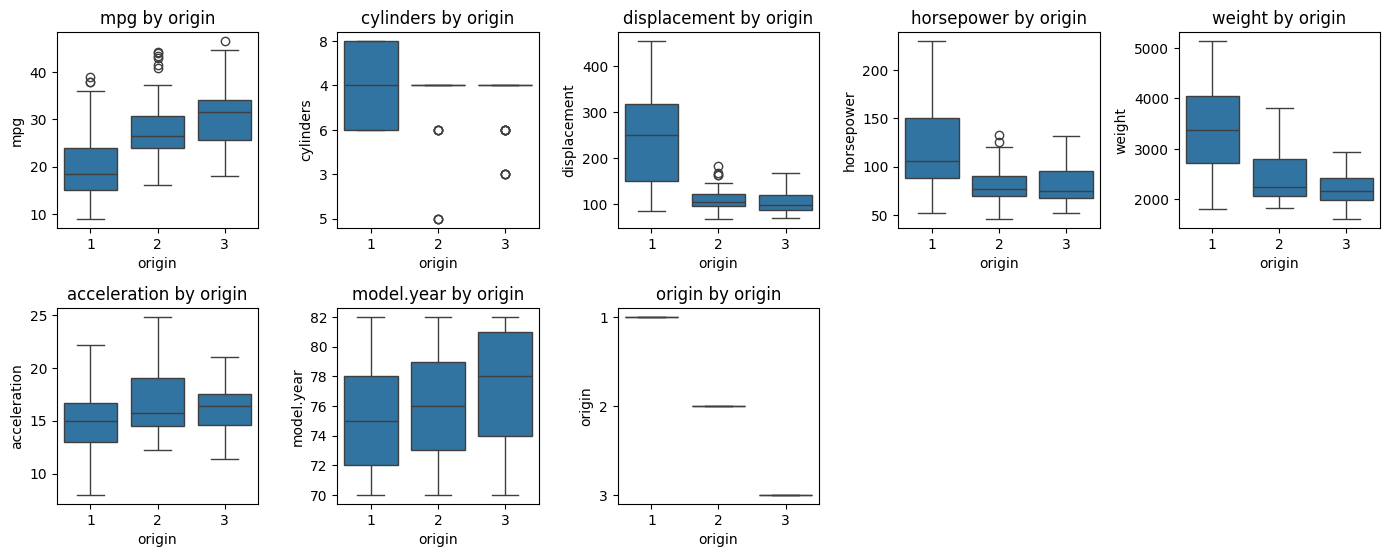

In [ ]:
plt.figure(figsize=(14, 8))
num_cols = len(df.columns[1:])
for i, column in enumerate(df.columns[1:]):
    plt.subplot(3, 5, i + 1)  # Adjusted the subplot grid to accommodate all columns
    sns.boxplot(x='origin', y=column, data=df)
    plt.title(f'{column} by origin')
plt.tight_layout()
plt.show()

**Code**

Kode ini bertujuan untuk membuat dan menampilkan boxplot dari berbagai kolom numerik dalam DataFrame (df), yang dikelompokkan berdasarkan kategori origin. Ini memungkinkan visualisasi distribusi data untuk setiap kolom dalam kaitannya dengan origin, sehingga memudahkan identifikasi pola atau perbedaan antara kategori yang berbeda.

**Output**

Gambar di atas menampilkan serangkaian boxplot yang disusun dalam format grid, dengan setiap plot mewakili variabel yang berbeda dari suatu dataset. Terdapat dua baris dan lima kolom plot, sehingga terdapat sepuluh boxplot secara keseluruhan. Setiap boxplot diberi label variabel yang diwakilinya: ‘mpg by origin’, ‘cylinders by origin’, ‘displacement by origin’, ‘horsepower by origin’, ‘weight by origin’, ‘acceleration by origin’, ‘model year by origin’, dan tiga variabel lainnya yang tidak sepenuhnya terlihat karena pemotongan gambar. Pada sumbu x di setiap plot terdapat label ‘origin’, menunjukkan bahwa data di-segmentasi berdasarkan kategori ini. Sumbu y mewakili rentang nilai untuk setiap variabel.

Setiap boxplot menampilkan median, kuartil, dan outliers potensial untuk variabel yang bersangkutan di berbagai asal. Visualisasi ini menarik dan relevan karena memungkinkan perbandingan antara kelompok yang berbeda (dalam hal ini, asal) untuk melihat bagaimana variabel lainnya mendistribusikan dalam kelompok-kelompok ini.

1.	mpg by origin: Boxplot ini menunjukkan distribusi konsumsi bahan bakar (miles per gallon) berdasarkan asal mobil (misalnya, Amerika, Eropa, atau Jepang). Di dalam boxplot, kita melihat median (garis tengah kotak), kuartil pertama dan ketiga (batas kotak), serta outliers (titik-titik di luar batas).

2.	cylinders by origin: Boxplot ini menampilkan jumlah silinder mesin berdasarkan asal mobil. Kita dapat melihat perbedaan distribusi jumlah silinder antara asal mobil yang berbeda.

3.	displacement by origin: Boxplot ini menunjukkan volume mesin (displacement) berdasarkan asal mobil. Kita dapat melihat variasi volume mesin di antara kelompok asal.

4.	horsepower by origin: Boxplot ini menampilkan daya mesin (horsepower) berdasarkan asal mobil. Kita dapat melihat perbedaan distribusi daya mesin antara asal mobil yang berbeda.

5.	weight by origin: Boxplot ini menunjukkan berat mobil berdasarkan asalnya. Kita dapat melihat variasi berat mobil di antara kelompok asal.

6.	acceleration by origin: Boxplot ini menampilkan percepatan mobil berdasarkan asalnya. Kita dapat melihat perbedaan distribusi percepatan antara asal mobil yang berbeda.

7.	model year by origin: Boxplot ini menunjukkan tahun model mobil berdasarkan asalnya. Kita dapat melihat variasi tahun model di antara kelompok asal.

Setiap boxplot memberikan informasi tentang bagaimana variabel-variabel ini berbeda di antara kelompok asal mobil. Semakin besar perbedaan distribusi antara kelompok asal, semakin relevan variabel tersebut dalam membedakan mobil dari berbagai negara.



# **Data Processing**
*penjelasan, drop 'model.year' karena paling besar, menggunakan 'origin' karena targetnya*

In [ ]:
# Drop 'model.year' column
df = df.drop(columns=['model.year'])

# Separate features and target
X = df.drop(columns=['origin'])  # Features
y = df['origin']  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (324, 7) (324,)
Test set shape: (82, 7) (82,)


**Penjelasan Code**

1. Menghapus Kolom 'model.year': Kolom ini dihapus karena dianggap tidak relevan dengan prediksi label 'origin'.

2. Memisahkan Fitur dan Target:

  - Fitur-fitur (kecuali 'origin') dipisahkan dan disimpan dalam variabel X.
  - Target variabel ('origin') disimpan dalam variabel y.

3. Membagi Data Menjadi Set Pelatihan dan Pengujian:

  - Data dibagi menjadi set pelatihan (X_train, y_train) dan set pengujian (X_test, y_test) dengan proporsi 80:20.

4. Memeriksa Bentuk Set Pelatihan dan Pengujian:

  - Bentuk set pelatihan dan pengujian dicetak untuk memastikan pembagian data sesuai dengan yang diharapkan.

**Output**

1.	Train set shape: (324, 7) (324,)
- Terdiri dari 324 baris dan 7 kolom.
- 	Setiap baris merupakan sebuah sampel data pelatihan.
- 	Setiap kolom mewakili fitur-fitur yang digunakan untuk melatih model.
- Terdapat 324 label target yang sesuai dengan jumlah baris data pelatihan.
2.	Test set shape: (82, 7) (82,)
- Terdiri dari 82 baris dan 7 kolom.
-	Setiap baris merupakan sebuah sampel data pengujian.
-	Setiap kolom mewakili fitur-fitur yang digunakan untuk menguji model.
-	Terdapat 82 label target yang sesuai dengan jumlah baris data pengujian.



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

print(X_train[:5])
print(X_test[:5])


NameError: name 'Pipeline' is not defined

1. scaler = StandardScaler(): Membuat objek StandardScaler yang akan digunakan untuk melakukan standarisasi data.

2. X_train = scaler.fit_transform(X_train): Menggunakan metode fit_transform() dari objek StandardScaler untuk menghitung mean dan standar deviasi dari set pelatihan (X_train) dan kemudian melakukan standarisasi pada data tersebut.

3. X_test = scaler.transform(X_test): Menggunakan metode transform() dari objek StandardScaler untuk menerapkan standarisasi yang sama yang dihitung dari set pelatihan (X_train) ke set pengujian (X_test). Perhatikan bahwa kita tidak lagi memanggil fit_transform() di sini karena kita ingin menggunakan mean dan standar deviasi yang telah dihitung dari set pelatihan untuk menerapkan standarisasi pada set pengujian, sehingga kita hanya menggunakan transform().

# **TPOT**

TPOT adalah singkatan dari "Tree-based Pipeline Optimization Tool". Ini adalah alat otomatisasi machine learning yang menggunakan algoritme genetika untuk mencari dan mengoptimalkan pipeline machine learning yang optimal untuk sebuah dataset. TPOT dapat melakukan pencarian secara otomatis terhadap berbagai jenis pemrosesan data, pemilihan fitur, transformasi, pemilihan model, dan hiperparameter tuning. Dengan menggunakan TPOT, pengguna dapat menghemat waktu dan upaya dalam mencari model machine learning yang terbaik untuk suatu masalah.

In [ ]:
pip install --upgrade setuptools

  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pkg_resources
print("pkg_resources is successfully imported.")

pkg_resources is successfully imported.


C:\Users\omen\AppData\Local\Temp\ipykernel_19316\833736157.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the digits dataset
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.75, test_size=0.25, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate TPOTClassifier
tpot_classifier = TPOTClassifier(generations=20, population_size=20, verbosity=2, random_state=42, scoring='accuracy', n_jobs=-1)

# Fit TPOTClassifier to training data
tpot_classifier.fit(X_train, y_train)

# Evaluate the best pipeline
accuracy = tpot_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


                                                                              
Generation 1 - Current best internal CV score: 0.9769847170590665
                                                                             
Generation 2 - Current best internal CV score: 0.9769847170590665
                                                                             
Generation 3 - Current best internal CV score: 0.9769847170590665
                                                                             
Generation 4 - Current best internal CV score: 0.9769847170590665
                                                                              
Generation 5 - Current best internal CV score: 0.9806994354949745
                                                                              
Generation 6 - Current best internal CV score: 0.9806994354949745
                                                                              
Generation 7 - Current best internal CV score: 0.98069

**Penjelasan Code**

1. Import TPOTClassifier: Ini mengimpor kelas TPOTClassifier dari modul tpot.

2. Menginisialisasi TPOTClassifier: Membuat objek TPOTClassifier dengan konfigurasi tertentu, seperti jumlah generasi, ukuran populasi, verbosity, random state, skor evaluasi, dan jumlah pekerjaan paralel (n_jobs).

3. Memuat dataset digit: Menggunakan fungsi load_digits() dari scikit-learn untuk memuat dataset digit.

4. Membagi data menjadi data latih dan data uji: Menggunakan fungsi train_test_split() dari scikit-learn untuk membagi dataset menjadi data latih (75%) dan data uji (25%).

5. Melatih model TPOTClassifier: Menggunakan metode fit() dari TPOTClassifier untuk melatih model pada data latih.

6. Mengevaluasi performa model: Menggunakan metode score() dari TPOTClassifier untuk mengevaluasi performa model pada data uji, menghasilkan akurasi model.

7. Mencetak akurasi: Mencetak akurasi model ke layar.


**Penjelasan output**

1. Generasi ke-n - Skor CV internal terbaik saat ini: Menunjukkan iterasi generasi TPOT dan skor validasi silang terbaik yang ditemukan pada generasi tersebut.

2. Best pipeline: Merupakan deskripsi dari model terbaik yang ditemukan oleh TPOT. Dalam kasus ini, model terbaik terdiri dari sebuah pipa yang terdiri dari beberapa langkah atau estimator. Pipa ini terdiri dari XGBClassifier yang diikuti oleh KNeighborsClassifier. Parameter-parameter dari estimator juga ditampilkan.

3. Accuracy: Ini adalah akurasi model terbaik yang dihasilkan oleh TPOT pada data uji. Dalam konteks ini, akurasi model terbaik adalah sekitar 98.89%.

# **NiaPY**
niapy adalah singkatan dari Nature-Inspired Algorithms in Python. Ini adalah sebuah perpustakaan Python yang menyediakan implementasi dari berbagai algoritma optimasi terinspirasi dari alam. Algoritma-algoritma ini terinspirasi dari perilaku dan mekanisme yang terjadi dalam alam, seperti perilaku kawanan burung, gerakan partikel dalam ruang pencarian, atau proses evolusi genetik.

Beberapa algoritma optimasi yang disediakan oleh niapy meliputi algoritma Differential Evolution (DE), Particle Swarm Optimization (PSO), Firefly Algorithm (FA), Grey Wolf Optimizer (GWO), dan masih banyak lagi. Perpustakaan ini memiliki antarmuka yang bersih dan mudah digunakan, sehingga memungkinkan pengguna untuk dengan mudah menerapkan dan menguji berbagai algoritma optimasi dalam berbagai masalah optimasi.

Dengan menggunakan niapy, pengguna dapat dengan mudah mengakses berbagai algoritma optimasi terinspirasi dari alam untuk menyelesaikan masalah-masalah optimasi yang kompleks dalam berbagai domain, seperti optimasi parameter, pemodelan matematis, pembelajaran mesin, dan optimisasi tugas-tugas mesin cerdas lainnya.

In [ ]:
# Define custom problem for Niapy
class CustomProblem(Problem):
    def __init__(self, dimension, lower, upper):
        super().__init__(dimension, lower, upper)

    def _evaluate(self, x):
        # Convert the solution to hyperparameters
        n_estimators = int(x[0])
        max_depth = int(x[1])

        # Train the model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        # Predict and calculate accuracy
        predictions = model.predict(X_test)

        # Return the negative accuracy because Niapy minimizes the function
        return -accuracy_score(y_test, predictions)

In [ ]:
# Set problem dimension, lower and upper bounds
dimension = 2
lower = [10, 5]
upper = [200, 20]

In [ ]:
# Instantiate the problem
problem = CustomProblem(dimension=dimension, lower=lower, upper=upper)

# **Run the Optimization**

In [ ]:
task = Task(problem=problem, max_evals=100)
algo = DifferentialEvolution(population_size=10, differential_weight=0.5, crossover_probability=0.7)
best = algo.run(task=task)

print("Best solution found: %s" % best[0])
print("Best solution fitness: %s" % -best[1])

Best solution found: [179.12388866  14.77365972]
Best solution fitness: 0.9777777777777777


# **Train the Final Model with the Best Hyperparameters**

In [ ]:
n_estimators_best = int(best[0][0])
max_depth_best = int(best[0][1])
final_model = RandomForestClassifier(n_estimators=n_estimators_best, max_depth=max_depth_best, random_state=42)
final_model.fit(X_train, y_train)

# Predict and evaluate the final model
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("Final model accuracy: %s" % final_accuracy)

Final model accuracy: 0.9777777777777777


# **Perbandingan kedua Tools**

# **Kesimpulan**